In [19]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
path = "./data/sewer_data/rain_timeseries"

df = pd.DataFrame()
timer = 16
print('Loop done in:')
for file in os.listdir(path):
    file = path + '/' + file
    timer = timer -1
    print(timer)
    if len(df) == 0:
        df = pd.read_csv(file, header=2)
    else:
        newlines = pd.read_csv(file, header=2)
        df = df.append(newlines)
        
df

Loop done in:
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


,Begin,Eind,Kwaliteit,Lekerstraat,11. Speelweide/Vlinkert,Rips,Handel,14. Koolhof,13. Heiakker,Vlierden,...,Ooivaarsrijt,de Brand,Bitswijk,de Geer-zuid,De Hoeven(Haarsteeg),11+19 Grevekeur,CHV-terrein,Geb. 12 Vughterpoort,Heusdenseweg(Haarsteeg),Bosscheweg
0,31-05-2018 22:00:00,31-05-2018 22:05:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,30-06-2019 22:00:00,30-06-2019 22:05:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,31-05-2019 22:00:00,31-05-2019 22:05:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,30-04-2019 22:00:00,30-04-2019 22:05:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,31-03-2019 22:00:00,31-03-2019 22:05:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,31-10-2018 22:35:00,31-10-2018 22:40:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8936,31-10-2018 22:40:00,31-10-2018 22:45:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8937,31-10-2018 22:45:00,31-10-2018 22:50:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8938,31-10-2018 22:50:00,31-10-2018 22:55:00,HydroNET D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df['Begin'] = pd.to_datetime(df['Begin'])
df['Eind'] = pd.to_datetime(df['Eind'])
df = df.set_index('Begin')
df = df.sort_index()

,Eind,Kwaliteit,Lekerstraat,11. Speelweide/Vlinkert,Rips,Handel,14. Koolhof,13. Heiakker,Vlierden,Helenaveen,...,Ooivaarsrijt,de Brand,Bitswijk,de Geer-zuid,De Hoeven(Haarsteeg),11+19 Grevekeur,CHV-terrein,Geb. 12 Vughterpoort,Heusdenseweg(Haarsteeg),Bosscheweg
Begin,,,,,,,,,,,,,,,,,,,,,
2017-12-31 23:00:00,2018-01-01 00:00:00,HydroNET D2,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
2018-01-01 00:00:00,2018-01-01 01:00:00,HydroNET D2,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0124,0.0000,0.0000,0.0000,0.0000,0.0
2018-01-01 01:00:00,2018-01-01 02:00:00,HydroNET D2,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0244,0.0082,0.0000,0.0789,0.0489,0.0000,0.0000,0.0820,0.0
2018-01-01 02:00:00,2018-01-01 03:00:00,HydroNET D2,0.0,0.0223,0.0,0.0,0.0000,0.0000,0.0000,0.1636,...,0.0186,0.0932,0.0199,0.0689,0.0186,0.0373,0.0351,0.0609,0.0205,0.0
2018-01-01 03:00:00,2018-01-01 04:00:00,HydroNET D2,0.0,0.0000,0.0,0.0,0.0477,0.0049,0.0032,0.0000,...,0.1992,0.0509,0.0264,0.0984,0.0036,0.0269,0.0110,0.0323,0.0176,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-07 23:35:00,2019-12-07 23:40:00,HydroNET D2,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
2019-12-07 23:40:00,2019-12-07 23:45:00,HydroNET D2,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
2019-12-07 23:45:00,2019-12-07 23:50:00,HydroNET D2,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0


In [4]:
df = df.sort_index()

In [5]:
#pd.date_range(start = '2017-12-31 23:00:00', end = '2019-12-07 23:55:00' ).difference(df.index)

In [6]:
def read_pumps_from_file(locatienaam):
    if locatienaam == 'Rompert':
        text_file = open("pumps_for_Rompert.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'Bokhoven':
        text_file = open("pumps_for_Bokhoven.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'Haarsteeg':
        text_file = open("pumps_for_Haarsteeg.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'Helftheuvelweg':
        text_file = open("pumps_for_Helftheuvelweg.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'Maaspoort':
        text_file = open("pumps_for_Maaspoort.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    if locatienaam == 'Oudengelseweg':
        text_file = open("pumps_for_OudEngelseweg.txt")
        lines = [x.strip() for x in text_file.readlines()]
        
    return(lines)

In [41]:
Rompert = read_pumps_from_file('Rompert') 
Bokhoven = read_pumps_from_file('Bokhoven') 
Haarsteeg = read_pumps_from_file('Haarsteeg') 
Helftheuvelweg = read_pumps_from_file('Helftheuvelweg') 
Maaspoort = read_pumps_from_file('Maaspoort') 
Oudengelseweg = read_pumps_from_file('Oudengelseweg') 

In [42]:
df[Rompert[0]]

Begin
2018-05-31 22:00:00    0.0
2018-05-31 22:05:00    0.0
2018-05-31 22:10:00    0.0
2018-05-31 22:15:00    0.0
2018-05-31 22:20:00    0.0
                      ... 
2018-08-14 08:00:00    0.0
2018-08-14 09:00:00    0.0
2018-08-14 10:00:00    0.0
2018-08-14 11:00:00    0.0
2018-08-14 12:00:00    0.0
Name: Geb. 25 Noord(Rompert), Length: 128102, dtype: float64

In [43]:

    
def sum_pumps(pumplist):
    out = pd.DataFrame()
    for pump in pumplist:
        if len(out) == 0:
            out = df[pump].groupby(pd.Grouper(level=0, freq='1H')).sum()
        else:
            out += df[pump].groupby(pd.Grouper(level=0, freq='1H')).sum()
    return out

Rompert = sum_pumps(Rompert)
Bokhoven = sum_pumps(Bokhoven)
Haarsteeg = sum_pumps(Haarsteeg)
Helftheuvelweg = sum_pumps(Helftheuvelweg)
Maaspoort = sum_pumps(Maaspoort)
Oudengelseweg = sum_pumps(Oudengelseweg)

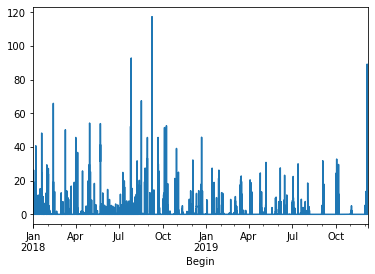

In [44]:
Maaspoort.sort_index().plot()

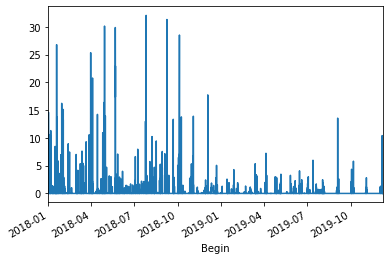

In [39]:
Maaspoort.sort_index().plot()

In [31]:
def get_dry_wet_times(df):
    Series_rolling_sum = df.rolling(12).sum()
    df_rolling_sum = pd.DataFrame(Series_rolling_sum)
    df_rolling_sum.columns = ['rain_sum']

    df_dry = df_rolling_sum[df_rolling_sum['rain_sum'] <= 0.05]
    df_rainy = df_rolling_sum[df_rolling_sum['rain_sum'] > 0.05]

    dry_times = df_dry.index.tolist()
    rainy_times = df_rainy.index.tolist()
    
    return(dry_times, rainy_times)

In [32]:
dry_rompert, rain_rompert = get_dry_wet_times(Rompert)
dry_bokhoven, rain_bokhoven = get_dry_wet_times(Bokhoven)
dry_haarsteeg, rain_haarsteeg = get_dry_wet_times(Haarsteeg)
dry_helftheuvelweg, rain_helftheuvelweg = get_dry_wet_times(Helftheuvelweg)
dry_maaspoort, rain_maaspoort = get_dry_wet_times(Maaspoort)
dry_oudengelseweg, rain_oudengelseweg = get_dry_wet_times(Oudengelseweg)

In [33]:
dry_rompert

[Timestamp('2018-02-10 19:00:00'),
 Timestamp('2018-02-10 20:00:00'),
 Timestamp('2018-02-10 21:00:00'),
 Timestamp('2018-02-10 22:00:00'),
 Timestamp('2018-02-10 23:00:00'),
 Timestamp('2018-02-11 00:00:00'),
 Timestamp('2018-02-24 16:00:00'),
 Timestamp('2018-02-24 17:00:00'),
 Timestamp('2018-02-24 18:00:00'),
 Timestamp('2018-02-24 19:00:00'),
 Timestamp('2018-02-24 20:00:00'),
 Timestamp('2018-02-24 21:00:00'),
 Timestamp('2018-02-24 22:00:00'),
 Timestamp('2018-02-24 23:00:00'),
 Timestamp('2018-02-25 00:00:00'),
 Timestamp('2018-02-25 01:00:00'),
 Timestamp('2018-02-25 02:00:00'),
 Timestamp('2018-02-25 03:00:00'),
 Timestamp('2018-02-25 04:00:00'),
 Timestamp('2018-02-25 05:00:00'),
 Timestamp('2018-02-25 06:00:00'),
 Timestamp('2018-02-25 07:00:00'),
 Timestamp('2018-02-25 08:00:00'),
 Timestamp('2018-02-25 09:00:00'),
 Timestamp('2018-02-25 10:00:00'),
 Timestamp('2018-02-25 11:00:00'),
 Timestamp('2018-02-25 12:00:00'),
 Timestamp('2018-02-25 13:00:00'),
 Timestamp('2018-02-

In [9]:
def write_dry_file(pump, title):
    with open(title, 'w') as f:
        for item in pump:
            f.write("%s\n" % item)

In [ ]:
write_dry_file(dry_rompert, 'dry_rompert')
write_dry_file(dry_bokhoven, 'dry_bokhoven')
write_dry_file(dry_haarsteeg, 'dry_haarsteeg')
write_dry_file(dry_helftheuvelweg, 'dry_helftheuvelweg')
write_dry_file(dry_maaspoort, 'dry_maaspoort')
write_dry_file(dry_oudengelseweg, 'dry_oudengelseweg')